**Función:** compara dataset original con versión 10k (limpia), por label.

**Requiere:**
- ../datasets/df_10k.json
- ../datasets/food_duplicates.json
- ../datasets/drink_duplicates.json
- ../datasets/outside_duplicates.json
- ../datasets/inside_duplicates.json
- ../datasets/menu_duplicates.json
- ../datasets/corrupt_ids.json
- ../datasets/food.json
- ../datasets/drink.json
- ../datasets/outside.json
- ../datasets/inside.json
- ../datasets/menu.json

**Crea:** (no crea ficheros)

In [1]:
import pandas as pd
import numpy as np

In [ ]:
ejecutadoEnGoogleDrive = False # True si se ejecuta en Google Drive

In [ ]:
if ejecutadoEnGoogleDrive:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH = '/content/drive/clasificacion_imagenes'
else:
    PATH = '../'

In [3]:
df = pd.read_json(PATH + "datasets/df_10k.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


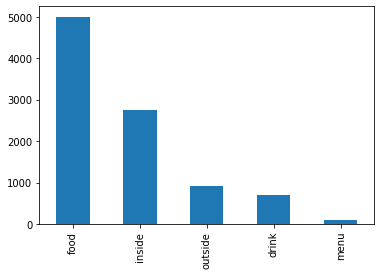

In [5]:
df.label.value_counts().plot(kind='bar')

In [6]:
df.label.value_counts()

food       5001
inside     2760
outside     920
drink       689
menu         84
Name: label, dtype: int64

In [7]:
df_duplicadosfood = pd.read_json(PATH + "datasets/food_duplicates.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [11]:
df_duplicadosfood.info

<bound method DataFrame.info of                                                  2.022091e+19  \
filename                           hNHjU4JLwNTdn4SfqOY8HQ.jpg   
location    /Users/tonivila/Downloads/food/hNHjU4JLwNTdn4S...   
duplicates  [/Users/tonivila/Downloads/food/kPL8IsaaMek_Be...   

                                                 2.022091e+19  \
filename                           1gfKQpQzuhgixwiknHTcOg.jpg   
location    /Users/tonivila/Downloads/food/1gfKQpQzuhgixwi...   
duplicates  [/Users/tonivila/Downloads/food/hMzm3QSqESncsv...   

                                                 2.022091e+19  \
filename                           hMzm3QSqESncsvJzOnCtJA.jpg   
location    /Users/tonivila/Downloads/food/hMzm3QSqESncsvJ...   
duplicates  [/Users/tonivila/Downloads/food/unfIdSfNAF9FQw...   

                                                 2.022091e+19  \
filename                           OdHM202oY1VwexMdL9xYVw.jpg   
location    /Users/tonivila/Downloads/food/OdHM202oY1Vw

In [12]:
df_duplicadosfood.describe

<bound method NDFrame.describe of                                                  2.022091e+19  \
filename                           hNHjU4JLwNTdn4SfqOY8HQ.jpg   
location    /Users/tonivila/Downloads/food/hNHjU4JLwNTdn4S...   
duplicates  [/Users/tonivila/Downloads/food/kPL8IsaaMek_Be...   

                                                 2.022091e+19  \
filename                           1gfKQpQzuhgixwiknHTcOg.jpg   
location    /Users/tonivila/Downloads/food/1gfKQpQzuhgixwi...   
duplicates  [/Users/tonivila/Downloads/food/hMzm3QSqESncsv...   

                                                 2.022091e+19  \
filename                           hMzm3QSqESncsvJzOnCtJA.jpg   
location    /Users/tonivila/Downloads/food/hMzm3QSqESncsvJ...   
duplicates  [/Users/tonivila/Downloads/food/unfIdSfNAF9FQw...   

                                                 2.022091e+19  \
filename                           OdHM202oY1VwexMdL9xYVw.jpg   
location    /Users/tonivila/Downloads/food/OdHM202oY1

In [13]:
df_duplicadosdrink = pd.read_json(PATH + "datasets/drink_duplicates.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [14]:
df_duplicadosdrink.count

<bound method DataFrame.count of                                                  2.022091e+19  \
filename                           HkWSiQIcb2MAk3_QGWNT7Q.jpg   
location    /Users/tonivila/Downloads/drinks/HkWSiQIcb2MAk...   
duplicates  [/Users/tonivila/Downloads/drinks/TDScc1hg15jo...   

                                                 2.022091e+19  \
filename                           PhOm8kF1326YnoAThPLuqg.jpg   
location    /Users/tonivila/Downloads/drinks/PhOm8kF1326Yn...   
duplicates  [/Users/tonivila/Downloads/drinks/33HBhkllZgmd...   

                                                 2.022091e+19  \
filename                           qK6OPCwAOpSMLu-MG-agvQ.jpg   
location    /Users/tonivila/Downloads/drinks/qK6OPCwAOpSML...   
duplicates  [/Users/tonivila/Downloads/drinks/6ecV8YoqLXH0...   

                                                 2.022091e+19  \
filename                           E5sKQiPC6H2M5ciWcDRg4Q.jpg   
location    /Users/tonivila/Downloads/drinks/E5sKQiPC6

In [15]:
df_duplicadosoutside = pd.read_json(PATH + "datasets/outside_duplicates.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [16]:
df_duplicadosoutside.count

<bound method DataFrame.count of                                                  2.022091e+19  \
filename                           UTm9GqyfGf0_tRBpoBOaTg.jpg   
location    /Users/tonivila/Downloads/outside/UTm9GqyfGf0_...   
duplicates  [/Users/tonivila/Downloads/outside/DgDEQRrQX-g...   

                                                 2.022091e+19  \
filename                           sVEd4wgk_5Nrp9OTwsMJ-g.jpg   
location    /Users/tonivila/Downloads/outside/sVEd4wgk_5Nr...   
duplicates  [/Users/tonivila/Downloads/outside/GBr7Eo6DHCJ...   

                                                 2.022091e+19  \
filename                           s8GzVb1L8sSf5agznhy9rw.jpg   
location    /Users/tonivila/Downloads/outside/s8GzVb1L8sSf...   
duplicates  [/Users/tonivila/Downloads/outside/qwnYdKNDfhI...   

                                                 2.022091e+19  \
filename                           OJR9P8Q2_E1ADrrVSZCelg.jpg   
location    /Users/tonivila/Downloads/outside/OJR9P8Q2

In [17]:
df_duplicadosinside = pd.read_json(PATH + "datasets/inside_duplicates.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [18]:
df_duplicadosinside.info

<bound method DataFrame.info of                                                  2.022091e+19  \
filename                           IpBxGMSTaVjkEiGUVZwggg.jpg   
location    /Users/tonivila/Downloads/inside/IpBxGMSTaVjkE...   
duplicates  [/Users/tonivila/Downloads/inside/_O6UlKBE-Rva...   

                                                 2.022091e+19  \
filename                           MaahtEgQjq6vN5AzMC6XLw.jpg   
location    /Users/tonivila/Downloads/inside/MaahtEgQjq6vN...   
duplicates  [/Users/tonivila/Downloads/inside/3BXrxVx8I792...   

                                                 2.022091e+19  \
filename                           ui2q1ci0iPQT1YLMbvOoXQ.jpg   
location    /Users/tonivila/Downloads/inside/ui2q1ci0iPQT1...   
duplicates  [/Users/tonivila/Downloads/inside/BobxgkSS7DeL...   

                                                 2.022091e+19  \
filename                           gV54k-JrlzGqTOLkBTbIFA.jpg   
location    /Users/tonivila/Downloads/inside/gV54k-Jrlz

In [19]:
df_corruptos = pd.read_json(PATH + "datasets/corrupt_ids.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [20]:
df_corruptos.describe

<bound method NDFrame.describe of                           0
0    74upe0h6XxwgzqpdnAh_7Q
1    -BIybLxzoFt2d2zbYRcfHA
2    -NGY_19QK2zq913HdiYc5A
3    m3oIKhKKCQD54y1E-dBKSw
4    feUGw0P5byOq4U40C77tyQ
..                      ...
101  cwwoZcpqdu2MwdDusNyTdg
102  Pk87_8Yndygr4LRUD_H7Hg
103  rLafN9k3_AF5lZU0cs3LZg
104  ARwqGQZaT0p-XpYYjMXgQg
105  l2vR3PyVMF3pgIERdDEuiQ

[106 rows x 1 columns]>

In [22]:
df_revisadosfood = pd.read_json(PATH + "datasets/food.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [23]:
df_revisadosfood.describe

<bound method NDFrame.describe of                     photo_id original_label reclass_label status
0     fB-J1F60DgMRoc8eI0z0Ew           food          food     OK
1     n2hdfzYgxL0twgfSDbro1w           food          food     OK
2     Z77aLYI_SvAl7PaJ62umJQ           food          food     OK
3     tBdw-FR8aNZcJLa5bX-SdA           food          food     OK
4     z-ftfswcyAAERjoMzKFJ5A           food          food     OK
...                      ...            ...           ...    ...
4996  iHaBS00OhLpvEg5QCDLcUQ           food          food     OK
4997  vk_F4LsT9b21TdiyCl79lA           food          food     OK
4998  vp5HXHpxOqjd3Ht60zefuw           food          food     OK
4999  u_7WS5HNrexty2M1jffdVw           food          food     OK
5000  M9Ouxc6TuXr-LG-a1nHsDQ           food          food     OK

[5001 rows x 4 columns]>

In [24]:
df_revisadosfood.reclass_label.value_counts()

food     4712
KO        278
drink      11
Name: reclass_label, dtype: int64

In [29]:
df_revisadosdrink = pd.read_json(PATH + "datasets/drink.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [30]:
df_revisadosdrink.describe

<bound method NDFrame.describe of                    photo_id original_label reclass_label status
0    xwhzMUdoHL4sTBAMphaztA          drink         drink     OK
1    QqjYTjs0EK-m-zQV3PkY_A          drink         drink     OK
2    kwM6iyPVuT9aGS9tuqtklw          drink         drink     OK
3    u3lv-l9Xyrf5zet_QsEXTw          drink         drink     OK
4    __qwnab_ljzLZdiCbrkuTA          drink         drink     OK
..                      ...            ...           ...    ...
684  l1wcJyPEzQn54YMahVCCVw          drink         drink     OK
685  XuXuGyj74neu2FVNpufDmA          drink         drink     OK
686  GSphRfIzr4PsvOT5y1_aag          drink         drink     OK
687  zK2VBqE2USQaAZFb6n1p1w          drink         drink     OK
688  ADNp61c1BEyDbumiXY0ILw          drink         drink     OK

[689 rows x 4 columns]>

In [31]:
df_revisadosdrink.reclass_label.value_counts()

drink    660
KO        26
food       3
Name: reclass_label, dtype: int64

In [32]:
df_revisadosinside = pd.read_json(PATH + "datasets/inside.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [33]:
df_revisadosinside.describe

<bound method NDFrame.describe of                     photo_id original_label reclass_label status
0     HoT-QTW9L--6_GR0Y58kfg         inside        inside     OK
1     H8bZI09DTbzZr3kjXB4qnw         inside        inside     OK
2     wzAtCWMPaUJw6JjE8lGRBA         inside        inside     OK
3     mbg1RnPDw2ZtZN94zZpJ5g         inside        inside     OK
4     MxsBlpi0zXXf17ADcjMBGQ         inside        inside     OK
...                      ...            ...           ...    ...
2755  n-M_P0qR5t0fBI8BInEczQ         inside            KO     KO
2756  AxRzOQw8aQPtQRdzRag9dw         inside          food     KO
2757  gwKVVGEvOGSeM5g74kBwTg         inside            KO     KO
2758  xO22mVoiG-YI0CSpbN9bPA         inside        inside     OK
2759  hHB8qh7zErVTuFTG5Webrg         inside            KO     KO

[2760 rows x 4 columns]>

In [34]:
df_revisadosinside.reclass_label.value_counts()

inside     2150
KO          517
food         71
menu          9
outside       7
drink         6
Name: reclass_label, dtype: int64

In [35]:
df_revisadosoutside = pd.read_json(PATH + "datasets/outside.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [36]:
df_revisadosoutside.reclass_label.value_counts()

outside    604
KO         316
Name: reclass_label, dtype: int64

In [37]:
df_revisadosmenu = pd.read_json(PATH + "datasets/menu.json")
df.head()

,photo_id,business_id,caption,label
0,fB-J1F60DgMRoc8eI0z0Ew,JHRlwxxKY0JJcU97rJ-Bug,,food
1,n2hdfzYgxL0twgfSDbro1w,6Y61FisC5lEVxLEaMzyUUQ,,food
2,Z77aLYI_SvAl7PaJ62umJQ,jar_5KMQZtgOseRdUN3L0w,Hazelnut gelato,food
3,tBdw-FR8aNZcJLa5bX-SdA,UB8sxbUN7kPZum22U2O9kg,Mushroom Cheesesteak,food
4,z-ftfswcyAAERjoMzKFJ5A,ArGw19nfPgjR28TTfgb7iw,Oven Roasted Salmon,food


In [38]:
df_revisadosmenu.reclass_label.value_counts()

menu    79
KO       5
Name: reclass_label, dtype: int64